In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix


# Reading data

In [58]:
data1 = pd.read_csv('Data/Dataset1.csv')
data1


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [59]:
data2 = pd.read_csv('Data/Dataset2.csv')
data2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


# Analyse des caractéristiques des attributs du dataset

<h3 style="color:#FFFFFF;">Calculer les mesures de tendance centrale et en déduire les symétries.</h3>

In [60]:
class Dataset:
    def __init__(self, data):
        
        self.data = data
        self.data = self.data.dropna()
        self.data = self.data.apply(pd.to_numeric, errors='coerce')
        self.data = self.data.dropna()

    def mean(self):
        return self.data.mean(numeric_only=True)

    def median(self):
        return self.data.median(numeric_only=True)

    def mode(self):
        mode = self.data.mode(numeric_only=True)
        return mode.mean()
    
    def tendance(self):
        df = ((self.data.mean(numeric_only=True) - self.data.median(numeric_only=True)) / self.data.mean(numeric_only=True))*100
        # Define conditions and replacement values
        conditions = {'Negative Asymmetric': lambda x: x < -5,
                    'Symmetric': lambda x: -5 <= x <= 5,
                    'Positive Asymmetric': lambda x: x > 5}

        # Apply conditions using apply and a lambda function
        df = df.apply(lambda col: np.select([(condition(col)) for condition in conditions.values()], list(conditions.keys())))

        return df
    

Set = Dataset(data1)

Set.tendance()

N                      Symmetric
P            Positive Asymmetric
K            Positive Asymmetric
pH                     Symmetric
EC                     Symmetric
OC                     Symmetric
S            Positive Asymmetric
Zn           Positive Asymmetric
Fe           Positive Asymmetric
Cu                     Symmetric
Mn                     Symmetric
B            Positive Asymmetric
OM                     Symmetric
Fertility    Negative Asymmetric
dtype: object

<h3 style="color:#FFFFFF;">Construire une boîte à moustache et afficher les données aberrantes.</h3>


[38 19 38 25 31 19 6 13 6 31 6 25 31]


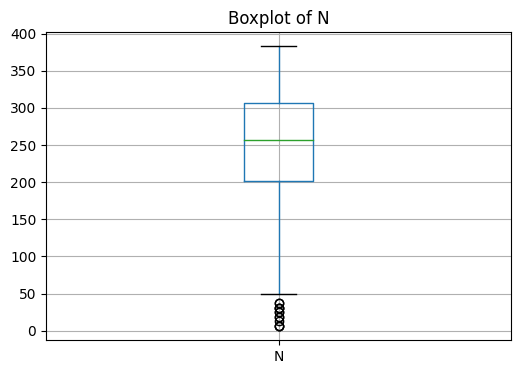

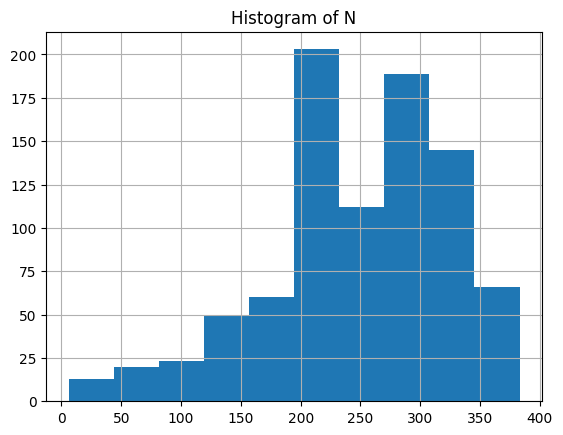

[59.2 78.9 18.4 20.4 19.3 18.2 19.5 20.8 21.5 20.4 21.1 76.8 103.1 78.9
 63.6 61.4 70.2 68.0 65.8 74.6 81.1 68.0 63.6 70.2 61.4 74.6 59.2 74.6
 74.6 78.9 81.1 98.7 74.6 85.5 70.2 72.4 76.8 65.8 76.8 111.8 125.0 118.4
 17.3 94.3 92.1 89.9 96.5 89.9 76.8 122.8 94.3 103.1 94.3 114.0 107.5 83.3
 94.3 92.1 87.7 107.5 125.0 107.5 98.7 114.0 96.5 103.1 105.3 98.7 83.3
 94.3 92.1 114.0 89.9 92.1 107.5 87.7 120.6]


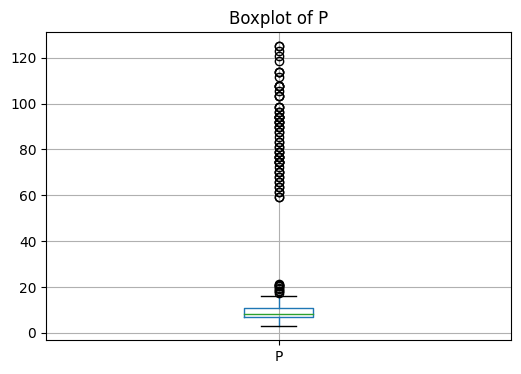

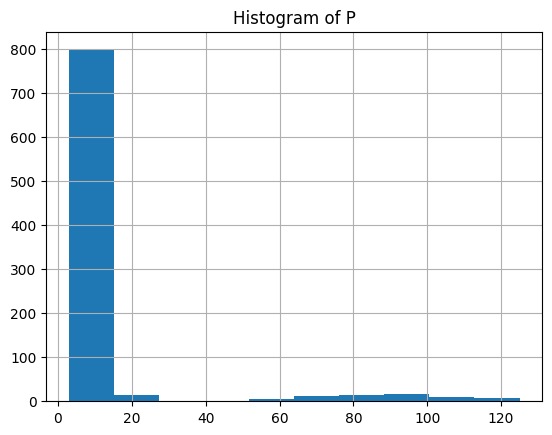

[127 11 887 876 845 887 1560 845 887]


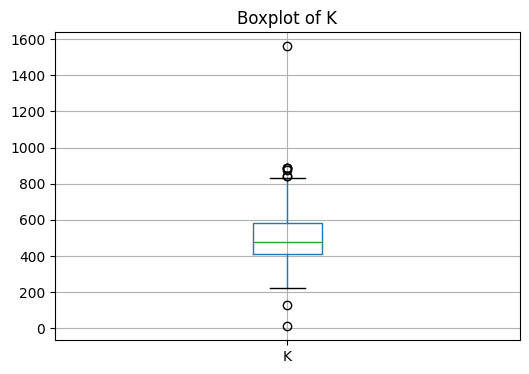

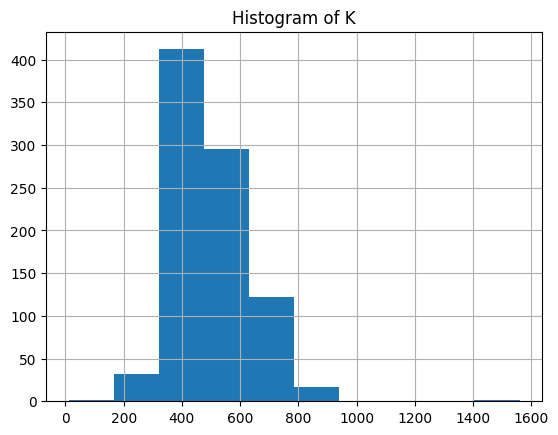

[0.9 0.9 8.1 8.3 9.97 8.3 8.4 8.95 9.5 10.05 10.6 11.15 8.26 8.1 8.4 8.1
 8.2 8.1 8.12 8.1 8.3 8.2 8.1 8.1 8.1 8.1 8.3 8.3 8.1 8.3 8.1 8.2 8.1 8.19
 8.1 8.19 8.1 8.26 8.4]


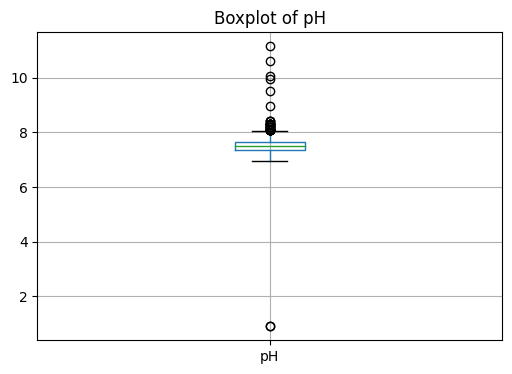

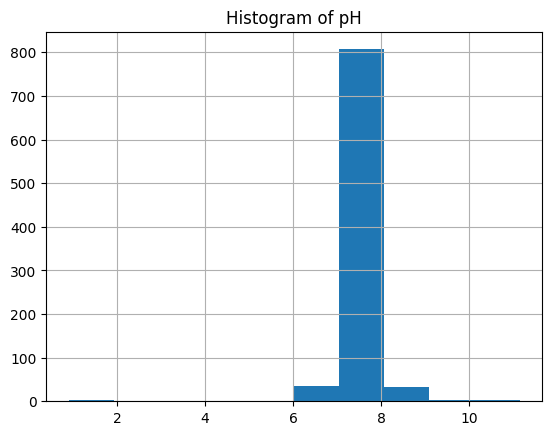

[0.1]


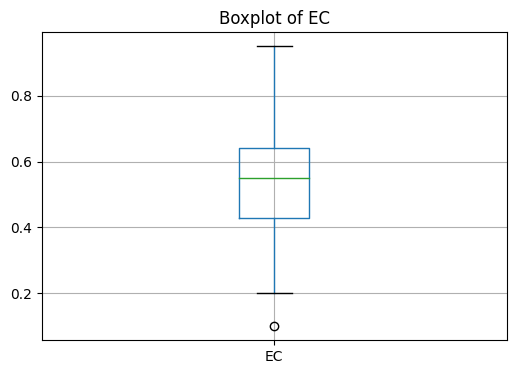

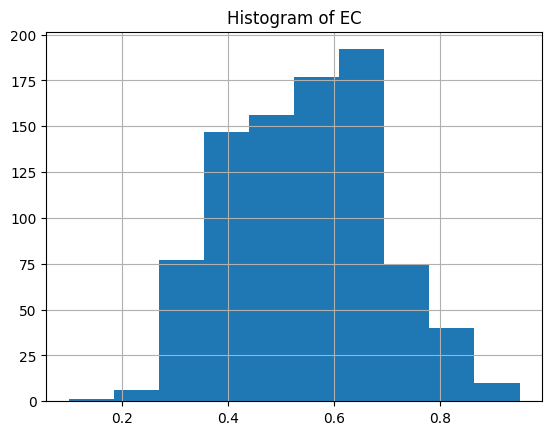

[24.0]


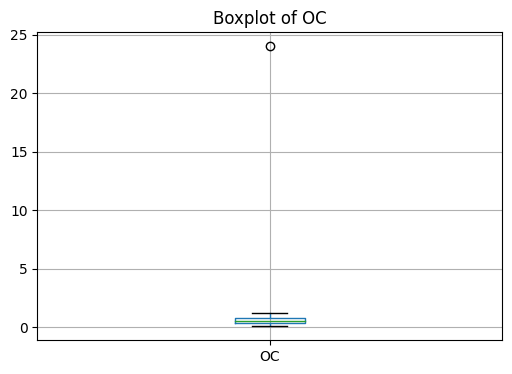

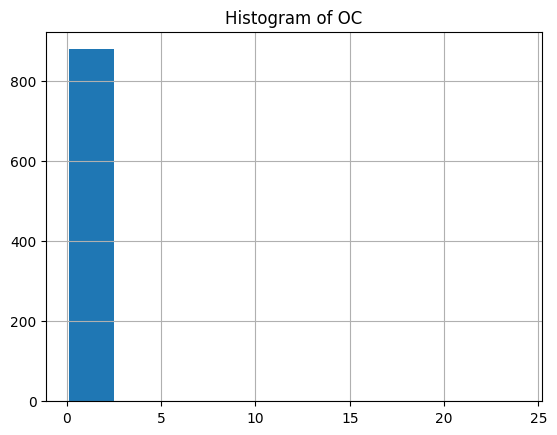

[25.4 26.0 23.6 27.2 15.8 26.2 26.0 15.8 15.0 25.4 22.4 22.4 24.0 26.0
 25.4 16.0 16.0 17.4 26.0 27.2 21.0 22.8 23.0 16.0 23.0 25.7 27.1 26.0
 19.5 23.9 28.6 26.24 23.9 23.9 29.8 17.1 21.4 17.2 17.0 27.3 31.0 24.4]


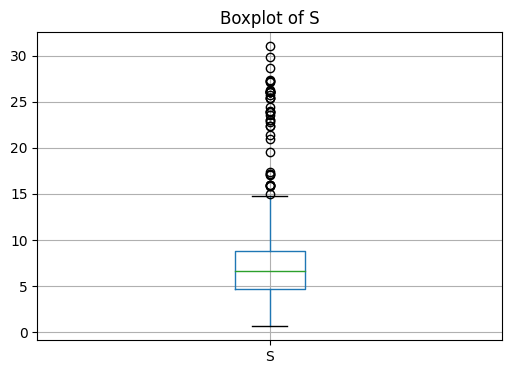

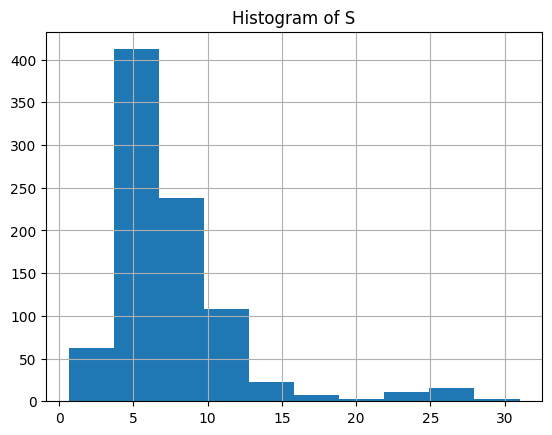

[0.83 0.76 0.78 0.79 0.85 42.0 38.0]


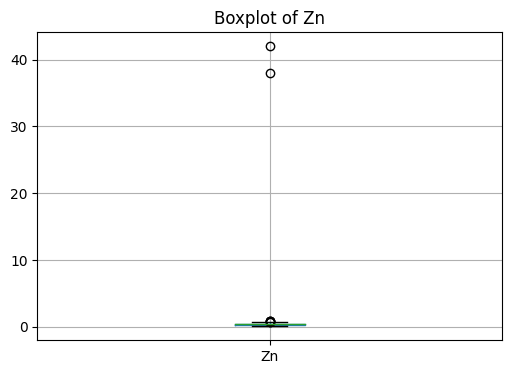

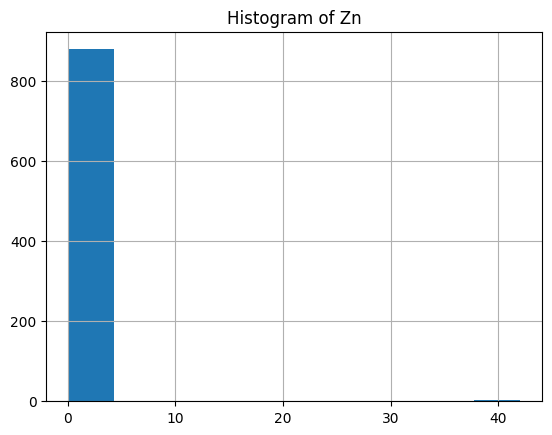

[44.0 34.0]


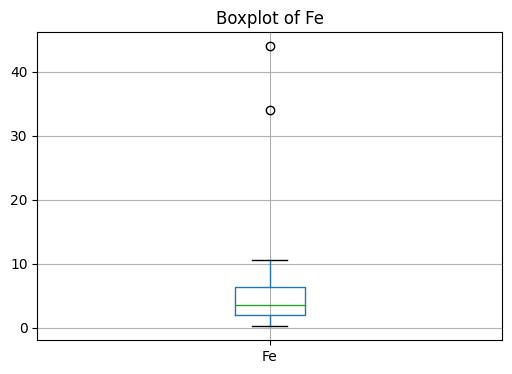

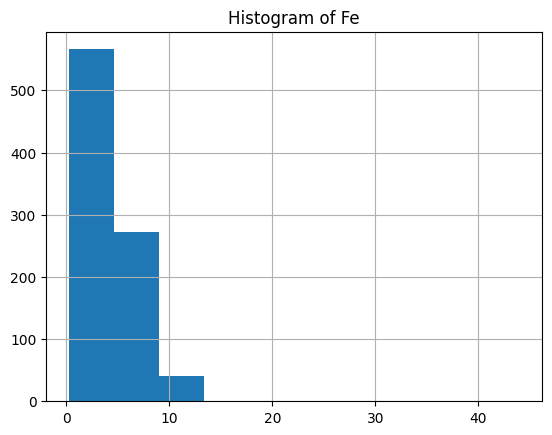

[3.02]


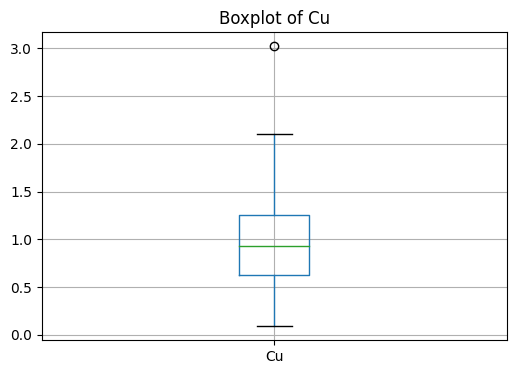

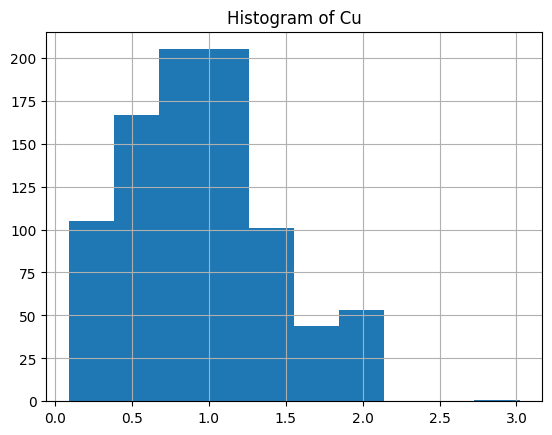

[31.0 30.48 21.32 19.69 19.69 19.52 21.02]


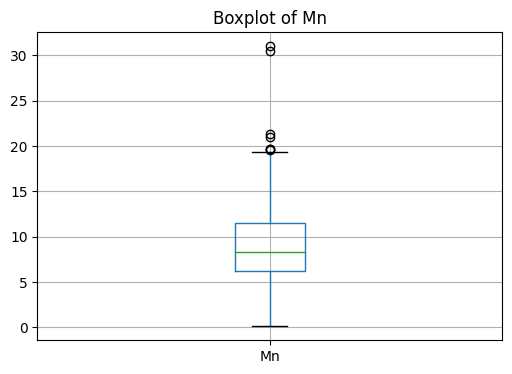

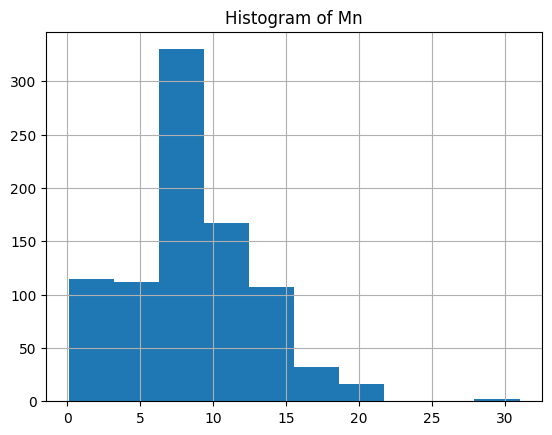

[2.29 2.03 1.82 2.26 1.82 1.88 1.68 1.79 2.0 2.41 2.38 2.12 2.29 2.56 1.32
 2.56 1.85 2.65 1.97 2.47 1.94 1.91 2.82 1.85 2.18 2.12 1.97 2.0 2.29 1.88
 2.47 2.53 2.41 2.0 1.85 2.18 2.47 2.82 1.82 2.23 1.94 2.21 1.82 1.32 2.59
 2.29 2.82 2.29 2.26 2.82 2.47 2.41 1.71 1.29 1.23 1.35 1.38 1.53 1.65
 1.59 1.53 1.32 1.29 2.41 2.0 2.06 2.26 2.12 2.35 2.18 2.65 2.26 1.62 2.12
 1.85 2.29 2.21 2.65 2.41 2.21 2.06 2.29 1.17 1.29 1.13 1.44 1.22 1.36
 1.17 1.23 1.32 2.13 1.42 1.88 1.21 1.29 2.11 1.3 1.24 1.69 1.13 1.49 1.41
 1.35 1.24 1.17 1.26 1.29 1.18 1.31 1.51 1.27 1.49 1.46 1.27 1.84 1.17
 1.82 2.56]


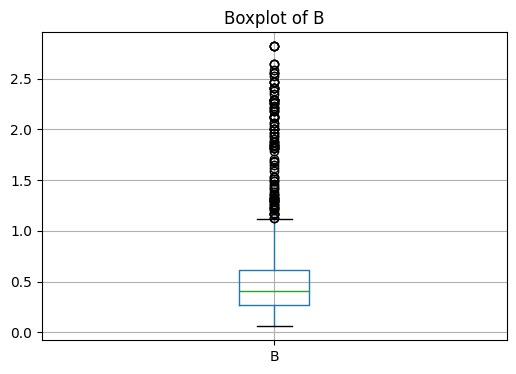

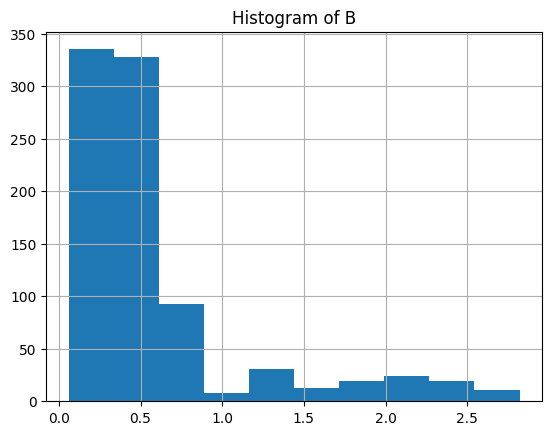

[41.28]


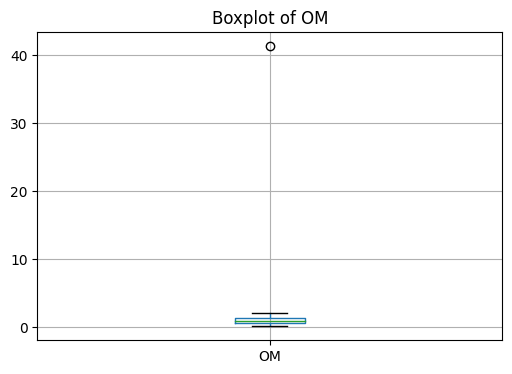

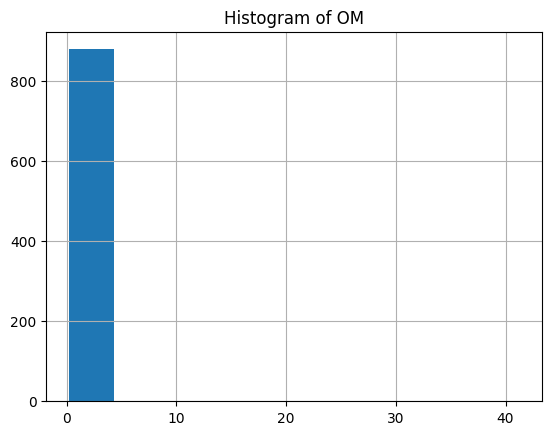

[]


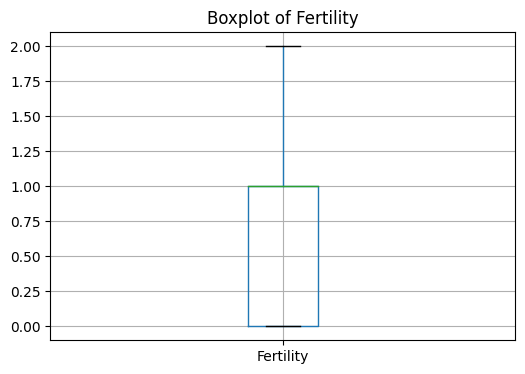

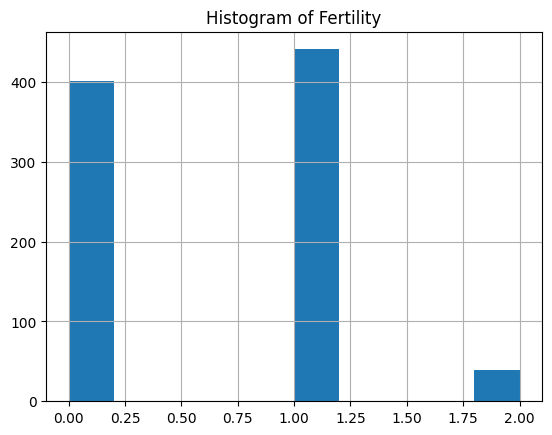

In [92]:
boxes = []
for i, column in enumerate(Set.data.columns, 1):
    plt.figure(figsize=(6, 4))
    box = Set.data.boxplot(column=column,return_type='dict')
    boxes.append(box)
    plt.title(f'Boxplot of {column}')
    print(boxes[i-1]['fliers'][0].get_ydata())
    Set.data.hist(column=column,)
    plt.title(f'Histogram of {column}')
    plt.show()
    


array([[<AxesSubplot:xlabel='N', ylabel='N'>,
        <AxesSubplot:xlabel='P', ylabel='N'>,
        <AxesSubplot:xlabel='K', ylabel='N'>,
        <AxesSubplot:xlabel='pH', ylabel='N'>,
        <AxesSubplot:xlabel='EC', ylabel='N'>,
        <AxesSubplot:xlabel='OC', ylabel='N'>,
        <AxesSubplot:xlabel='S', ylabel='N'>,
        <AxesSubplot:xlabel='Zn', ylabel='N'>,
        <AxesSubplot:xlabel='Fe', ylabel='N'>,
        <AxesSubplot:xlabel='Cu', ylabel='N'>,
        <AxesSubplot:xlabel='Mn', ylabel='N'>,
        <AxesSubplot:xlabel='B', ylabel='N'>,
        <AxesSubplot:xlabel='OM', ylabel='N'>,
        <AxesSubplot:xlabel='Fertility', ylabel='N'>],
       [<AxesSubplot:xlabel='N', ylabel='P'>,
        <AxesSubplot:xlabel='P', ylabel='P'>,
        <AxesSubplot:xlabel='K', ylabel='P'>,
        <AxesSubplot:xlabel='pH', ylabel='P'>,
        <AxesSubplot:xlabel='EC', ylabel='P'>,
        <AxesSubplot:xlabel='OC', ylabel='P'>,
        <AxesSubplot:xlabel='S', ylabel='P'>,
        <AxesS

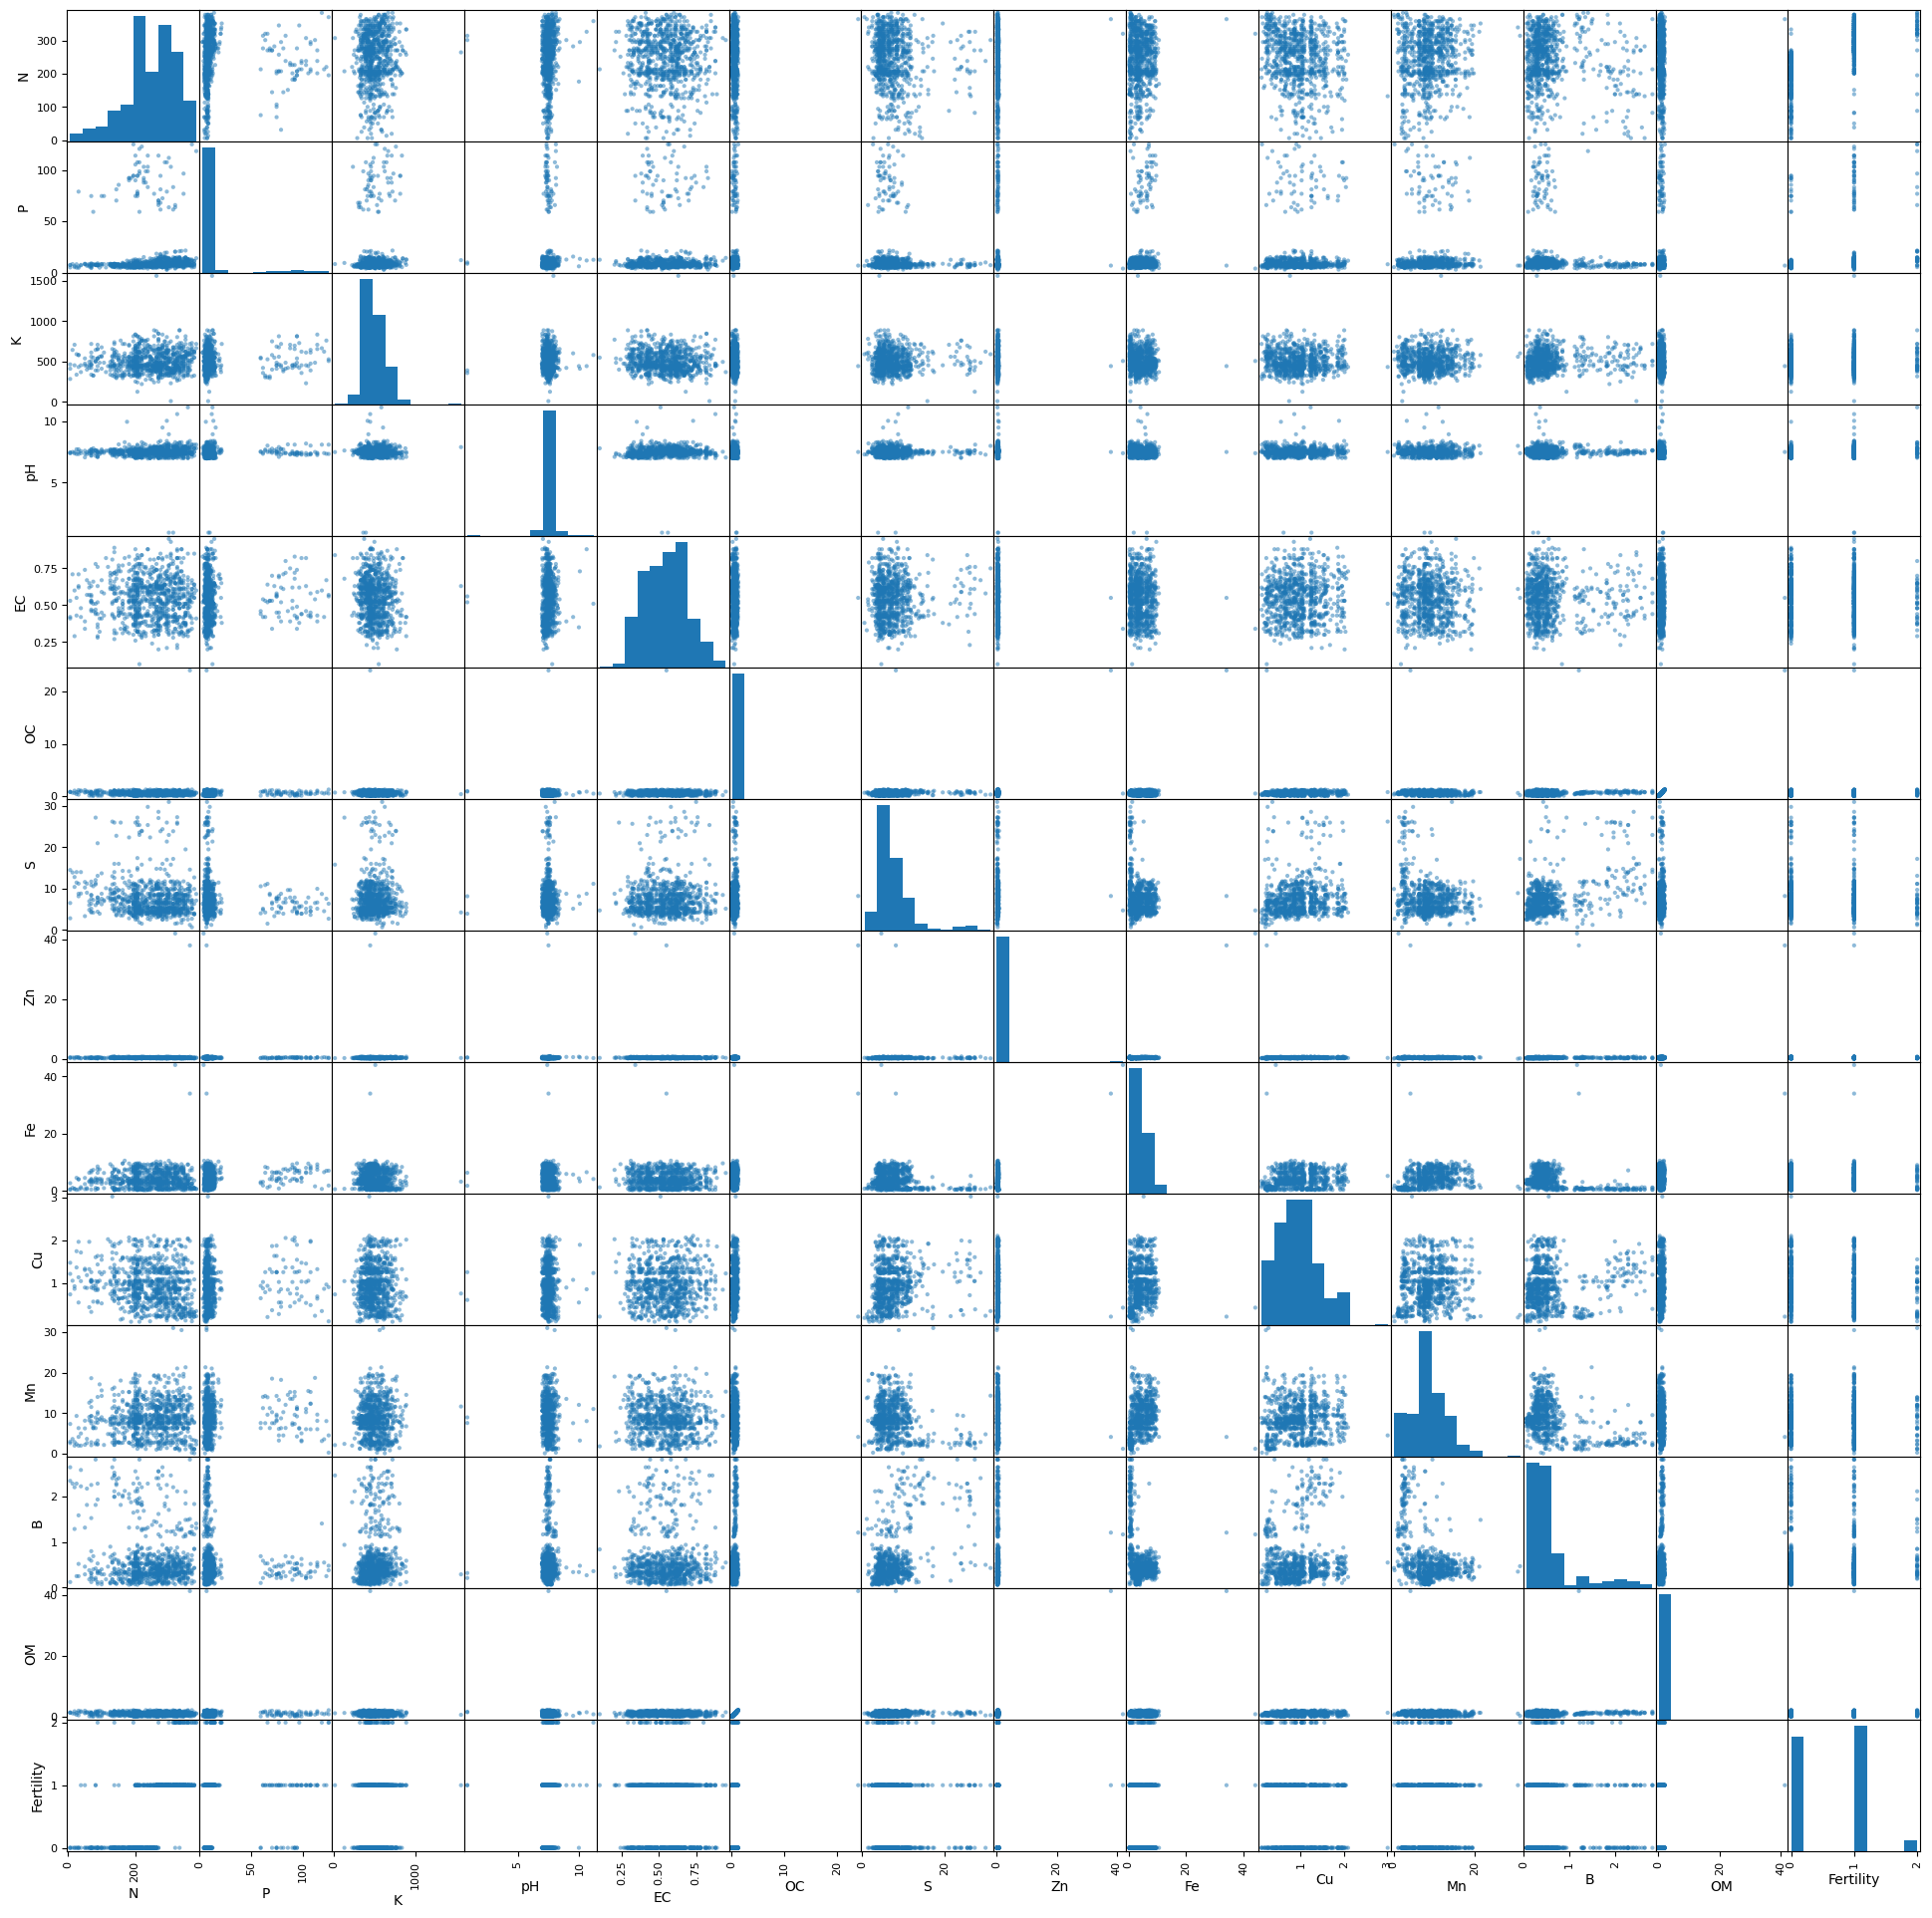

In [87]:
scatter_matrix(Set.data, figsize=(24, 24), diagonal='hist')